In [1]:
# pip install pandas

In [2]:
# pip install plotly

In [3]:
# pip install dash

In [97]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [5]:
movies = pd.read_csv('Movies.csv', index_col='index')

In [6]:
movies.head(10)

,Title,Release Date,Description,URL,Runtime (mins),Genres,Directors,Movie Series,Order
index,,,,,,,,,
0,101 Dalmatians,18-11-1996,NaN,https://www.imdb.com/title/tt0115433/,103.0,"Adventure, Comedy, Crime, Family",Stephen Herek,101 Dalmatians,1
1,102 Dalmatians,22-11-2000,NaN,https://www.imdb.com/title/tt0211181/,100.0,"Adventure, Comedy, Family",Kevin Lima,101 Dalmatians,2
2,12 Rounds,19-03-2009,NaN,https://www.imdb.com/title/tt1160368/,108.0,"Action, Crime, Thriller",Renny Harlin,12 Rounds,1
3,12 Rounds 2: Reloaded,04-06-2013,NaN,https://www.imdb.com/title/tt2317524/,95.0,"Action, Adventure, Thriller",Roel Reiné,12 Rounds,2
4,21 Jump Street,12-03-2012,NaN,https://www.imdb.com/title/tt1232829/,109.0,"Action, Comedy, Crime","Christopher Miller, Phil Lord",21 Jump Street,1
5,22 Jump Street,04-06-2014,NaN,https://www.imdb.com/title/tt2294449/,112.0,"Action, Comedy, Crime","Christopher Miller, Phil Lord",21 Jump Street,2
6,28 Days Later...,01-11-2002,NaN,https://www.imdb.com/title/tt0289043/,113.0,"Drama, Horror, Sci-Fi, Thriller",Danny Boyle,28 Days Later...,1
7,28 Weeks Later,26-04-2007,NaN,https://www.imdb.com/title/tt0463854/,100.0,"Horror, Sci-Fi",Juan Carlos Fresnadillo,28 Days Later...,2
8,30 Days of Night,16-10-2007,NaN,https://www.imdb.com/title/tt0389722/,113.0,"Action, Horror, Thriller",David Slade,30 Days of Night,1


In [7]:
movies.shape

(847, 9)

In [8]:
movies.columns

Index(['Title', 'Release Date', 'Description', 'URL', 'Runtime (mins)',
       'Genres', 'Directors', 'Movie Series', 'Order'],
      dtype='object')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 0 to 865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           847 non-null    object 
 1   Release Date    847 non-null    object 
 2   Description     0 non-null      float64
 3   URL             847 non-null    object 
 4   Runtime (mins)  843 non-null    float64
 5   Genres          847 non-null    object 
 6   Directors       847 non-null    object 
 7   Movie Series    847 non-null    object 
 8   Order           847 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 66.2+ KB


In [10]:
moviesRatings = pd.read_csv('MoviesRatings.csv', index_col='index')

In [11]:
moviesRatings.tail()

,IMDb_ID,IMDb Rating,Num Votes
index,,,
1069,tt1560220,6.7,113335.0
1070,tt0081505,8.4,857784.0
1071,tt5606664,7.4,106753.0
1072,tt0276919,8.0,133780.0
1073,tt0342735,7.3,21954.0


In [12]:
moviesRatings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 0 to 1073
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDb_ID      1074 non-null   object 
 1   IMDb Rating  1059 non-null   float64
 2   Num Votes    1053 non-null   float64
dtypes: float64(2), object(1)
memory usage: 33.6+ KB


In [13]:
movies['IMDb_ID'] = movies['URL'].str.extract(r'/title/(tt\d+)/')

In [14]:
movies['Release Date'] = pd.to_datetime(movies['Release Date'], format='%d-%m-%Y')
movies['Year'] = movies['Release Date'].dt.year

In [15]:
movies[['Title','URL','IMDb_ID','Release Date','Year']].head()

,Title,URL,IMDb_ID,Release Date,Year
index,,,,,
0,101 Dalmatians,https://www.imdb.com/title/tt0115433/,tt0115433,1996-11-18,1996
1,102 Dalmatians,https://www.imdb.com/title/tt0211181/,tt0211181,2000-11-22,2000
2,12 Rounds,https://www.imdb.com/title/tt1160368/,tt1160368,2009-03-19,2009
3,12 Rounds 2: Reloaded,https://www.imdb.com/title/tt2317524/,tt2317524,2013-06-04,2013
4,21 Jump Street,https://www.imdb.com/title/tt1232829/,tt1232829,2012-03-12,2012


In [16]:
cols = ['IMDb_ID', 'Title', 'Movie Series', 'Order', 'Genres', 'Year']
movies = movies[cols]
movies.head()

,IMDb_ID,Title,Movie Series,Order,Genres,Year
index,,,,,,
0,tt0115433,101 Dalmatians,101 Dalmatians,1,"Adventure, Comedy, Crime, Family",1996
1,tt0211181,102 Dalmatians,101 Dalmatians,2,"Adventure, Comedy, Family",2000
2,tt1160368,12 Rounds,12 Rounds,1,"Action, Crime, Thriller",2009
3,tt2317524,12 Rounds 2: Reloaded,12 Rounds,2,"Action, Adventure, Thriller",2013
4,tt1232829,21 Jump Street,21 Jump Street,1,"Action, Comedy, Crime",2012


In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 0 to 865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IMDb_ID       847 non-null    object
 1   Title         847 non-null    object
 2   Movie Series  847 non-null    object
 3   Order         847 non-null    int64 
 4   Genres        847 non-null    object
 5   Year          847 non-null    int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 43.0+ KB


In [18]:
moviesJoined = pd.merge(movies, moviesRatings, on='IMDb_ID', how='left')
moviesJoined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IMDb_ID       847 non-null    object 
 1   Title         847 non-null    object 
 2   Movie Series  847 non-null    object 
 3   Order         847 non-null    int64  
 4   Genres        847 non-null    object 
 5   Year          847 non-null    int32  
 6   IMDb Rating   847 non-null    float64
 7   Num Votes     843 non-null    float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 49.8+ KB


In [19]:
# Remove any films with no sequals
moviesJoined.groupby('Movie Series').filter(lambda x: len(x) == 1)

,IMDb_ID,Title,Movie Series,Order,Genres,Year,IMDb Rating,Num Votes
8,tt0389722,30 Days of Night,30 Days of Night,1,"Action, Horror, Thriller",2007,6.6,160930.0
11,tt0134273,8MM,8MM,1,"Mystery, Thriller",1999,6.5,120511.0
14,tt1606378,A Good Day to Die Hard,A Good Day to Die Hard,1,"Action, Thriller",2013,5.3,194603.0
27,tt0106220,Addams Family Values,Addams Family alues,1,"Comedy, Fantasy",1993,6.7,76150.0
37,tt0369226,Alone in the Dark,Alone in the Dark,1,"Action, Horror, Sci-Fi",2005,2.4,41244.0
...,...,...,...,...,...,...,...,...
819,tt0111686,Wes Craven's New Nightmare,Wes Craven's New Nightmare,1,"Fantasy, Horror, Mystery, Thriller",1994,6.4,49287.0
822,tt0120890,Wild Things,Wild Things,1,"Crime, Drama, Mystery, Thriller",1998,6.5,105272.0
823,tt0120524,Wishmaster,Wishmaster,1,"Fantasy, Horror",1997,5.8,19251.0
824,tt1646987,Wrath of the Titans,Wrath of the Titans,1,"Action, Adventure, Fantasy",2012,5.7,178430.0


In [20]:
sequals = moviesJoined.groupby('Movie Series').filter(lambda x: len(x) > 1)

In [21]:
sequals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 846
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IMDb_ID       733 non-null    object 
 1   Title         733 non-null    object 
 2   Movie Series  733 non-null    object 
 3   Order         733 non-null    int64  
 4   Genres        733 non-null    object 
 5   Year          733 non-null    int32  
 6   IMDb Rating   733 non-null    float64
 7   Num Votes     730 non-null    float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 48.7+ KB


In [22]:
sequals.head()

,IMDb_ID,Title,Movie Series,Order,Genres,Year,IMDb Rating,Num Votes
0,tt0115433,101 Dalmatians,101 Dalmatians,1,"Adventure, Comedy, Crime, Family",1996,5.7,98439.0
1,tt0211181,102 Dalmatians,101 Dalmatians,2,"Adventure, Comedy, Family",2000,4.9,33823.0
2,tt1160368,12 Rounds,12 Rounds,1,"Action, Crime, Thriller",2009,5.6,26828.0
3,tt2317524,12 Rounds 2: Reloaded,12 Rounds,2,"Action, Adventure, Thriller",2013,5.3,5141.0
4,tt1232829,21 Jump Street,21 Jump Street,1,"Action, Comedy, Crime",2012,7.2,498876.0


In [23]:
seriesAverage = sequals.groupby('Movie Series')['IMDb Rating'].mean().reset_index()
seriesAverage = seriesAverage.sort_values(by='IMDb Rating', ascending=False)
seriesAverage.head(10)

,Movie Series,IMDb Rating
212,The Lord of the Rings,8.800
202,The Godfather,8.600
237,Toy Story,8.075
112,Kill Bill,8.050
241,Tropa de Elite,8.050
34,Blade Runner,8.050
183,The Avengers,8.050
29,Before Sunrise,8.000
37,Brat,7.900
46,Cidade de Deus,7.900


In [24]:
seriesAverage.tail(5)

,Movie Series,IMDb Rating
213,The Mask,4.550000
116,Lawnmower Man,4.000000
36,Boogeyman,3.950000
101,In the Name of the King,3.333333
35,BloodRayne,2.950000


In [25]:
longestSeries = sequals.groupby('Movie Series').size()
longestSeries.sort_values(ascending=False)

Movie Series
Star Trek          13
Halloween          11
Friday the 13th     9
Harry Potter        8
Saw                 7
                   ..
It                  2
Kick-Ass            2
Kill Bill           2
Kingsman            2
xXx                 2
Length: 259, dtype: int64

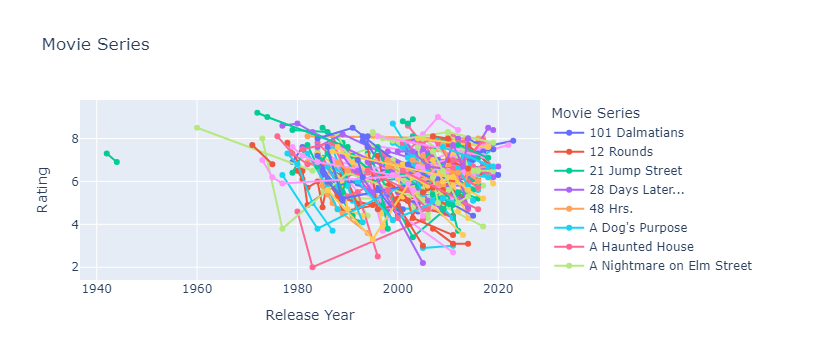

In [30]:
fig = go.Figure()

fig = px.line(
    sequals,
    x='Year',
    y='IMDb Rating',
    color='Movie Series',
    title='Movie Series',
    labels={'IMDb Rating': 'Rating', 'Year': 'Release Year'},
    hover_data={'Title': True, 
                'Movie Series': True, 
                'IMDb Rating': True, 
                'Year': True},
    line_shape='linear',
    markers=True  # Show markers
)

fig.show()

In [27]:
# Create Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    dcc.Input(id='series-search', 
              type='text', 
              placeholder='Search by movie series'),
    dcc.Graph(id='line-plot'),
])

# Callback to update line plot
@app.callback(
    Output('line-plot', 'figure'),
    [Input('series-search', 'value')]
)
def update_line_plot(series_search):
    filtered_data = sequals.copy()

    if series_search:
        filtered_data = filtered_data[filtered_data['Movie Series'].str.contains(series_search, 
                                                                                 case=False, 
                                                                                 na=False)]
    fig = px.line(
        filtered_data,
        x='Year',
        y='IMDb Rating',
        color='Movie Series',
        title='Movie Series',
        labels={'IMDb Rating': 'Rating', 'Year': 'Release Year'},
        hover_data={'Title': True, 
                    'Movie Series': True, 
                    'IMDb Rating': True, 
                    'Year': True},
        line_shape='linear',
        markers=True,  # Show markers
    )

    # Update layout for desired behavior
    fig.update_layout(legend_title_text='Movie Series')  # Set legend title

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [34]:
sequals = sequals[sequals['Year'] >= 1960]

In [74]:
sequals['Year'].max()

2023

In [38]:
sequals['Order'].min()

2

In [37]:
sequals = sequals[sequals['Order'] > 1]

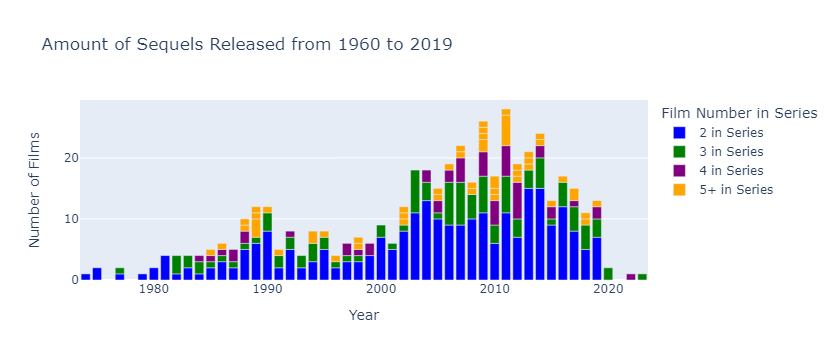

In [123]:
color_map = {
    '1 in Series': 'red',
    '2 in Series': 'blue',
    '3 in Series': 'green',
    '4 in Series': 'purple',
    '5+ in Series': 'orange'
}

# Group by 'Year' and 'Order', then count the occurrences
groupedFilmOrderDF = sequals.groupby(['Year', 'Order']).size().reset_index(name='Film Count')

# Create 'Order Group' based on conditions
groupedFilmOrderDF['Order Group'] = groupedFilmOrderDF['Order'].apply(lambda x: '5+ in Series' if x >= 5 else f'{x} in Series')

# Create a stacked bar graph
fig = px.bar(groupedFilmOrderDF, 
             x='Year', 
             y='Film Count', 
             color='Order Group',
             color_discrete_map=color_map, 
             title='Amount of Sequels Released from 1960 to 2019',
             labels={'Film Count': 'Number of Films'},
             hover_data={'Film Count': True, 'Order Group': True, 'Year': True},
            )

# Name the legend
fig.update_layout(legend_title_text='Film Number in Series')

# Show the plot
fig.show()

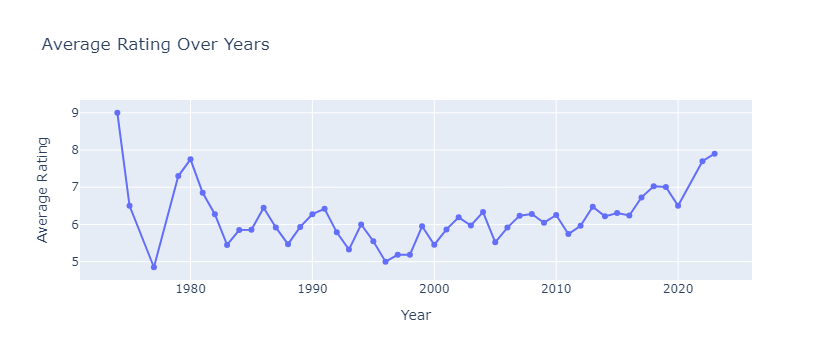

In [108]:
groupedRatingDF = sequals.groupby(['Year'])['IMDb Rating'].mean().reset_index(name='Average Rating')

fig = px.scatter(groupedRatingDF, 
                 x='Year', 
                 y='Average Rating', 
                 title='Average Rating Over Years',
                 labels={'Average Rating': 'Average Rating'},
                 hover_data={'Year': True, 'Average Rating': True})

# Connect points with lines
fig.update_traces(mode='lines+markers')

# Show the plot
fig.show()

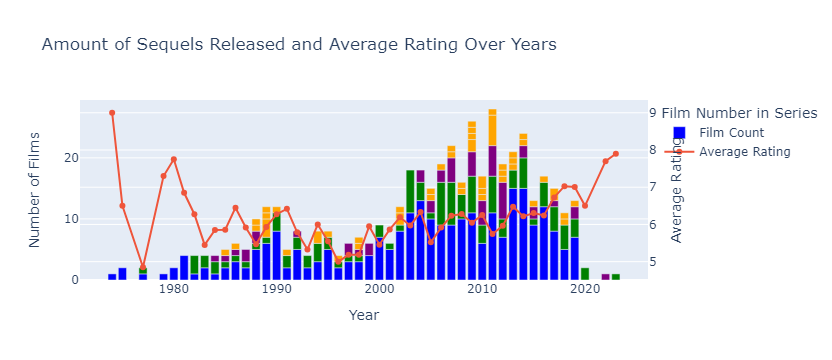

In [129]:
# Create a bar trace with Plotly Graph Objects
bar_trace = go.Bar(
    x=groupedFilmOrderDF['Year'],
    y=groupedFilmOrderDF['Film Count'],
    marker_color=groupedFilmOrderDF['Order Group'].map(color_map),
    name='Film Count',
)

scatter_trace = go.Scatter(
    x=groupedRatingDF['Year'],
    y=groupedRatingDF['Average Rating'],
    mode='lines+markers',
    name='Average Rating',
    text=groupedRatingDF['Average Rating'],
    yaxis='y2'
)

layout = go.Layout(
    title='Amount of Sequels Released and Average Rating Over Years',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Films'),
    yaxis2=dict(
        title='Average Rating',
        overlaying='y',
        side='right'
    ),
    legend_title_text='Film Number in Series',
)

fig = go.Figure(data=[bar_trace, scatter_trace], layout=layout)

# Step 9: Show the plot
fig.show()